In [ ]:
# ZZ_scratch.ipynb - This is a general scratchpad used for code development and testing. Don't expect it to work as written
# Eric G. Suchanek, PhD. 2024

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pyvista as pv
import logging
import plotly.graph_objects as go
import plotly.express as px

import os
import pandas as pd
import numpy as np
import proteusPy as pp
from proteusPy import Disulfide, DisulfideList, DisulfideIO

from plotly.subplots import make_subplots
import platform

from proteusPy import (
    CA_CUTOFF,
    SG_CUTOFF,
    SS_CONSENSUS_BIN_FILE,
    SS_CONSENSUS_OCT_FILE,
    ATOM_COLORS,
    ATOM_RADII_COVALENT,
    ATOM_RADII_CPK,
    BOND_COLOR,
    BOND_RADIUS,
    BS_SCALE,
    FONTSIZE,
    SPEC_POWER,
    SPECULARITY,
)

from proteusPy.ProteusGlobals import DATA_DIR

HOME = Path.home()
PDB = Path(os.getenv("PDB", HOME / "pdb"))

MODEL_DIR = PDB / "good"

PDB_DATA_DIR = PDB / "data"
SAVE_DIR = HOME / "Documents" / "proteusPyDocs" / "classes"
REPO_DIR = HOME / "repos" / "proteusPy" / "data"

OCTANT = SAVE_DIR / "octant"
OCTANT.mkdir(parents=True, exist_ok=True)

BINARY = SAVE_DIR / "binary"
BINARY.mkdir(parents=True, exist_ok=True)

SEXTANT = SAVE_DIR / "sextant"
SEXTANT.mkdir(parents=True, exist_ok=True)

PBAR_COLS = 78
# _logger = pp.create_logger(__name__)
# _logger.setLevel(logging.WARNING)

pp.describe()

# CA_CUTOFF = -1.0
# SG_CUTOFF = -1.0
# _ = pp.set_logger_level_for_module("proteusPy", "WARNING")
pp.configure_master_logger("proteusPy.log", log_level="WARNING")

INFO:proteusPy:ProteusPy 0.99.32.pre initialized.
INFO:proteusPy:Plotly theme set to: plotly_white
INFO:proteusPy:PyVista theme set to: light
INFO:proteusPy:Logging level setting to default: 30


In [2]:
pdb = pp.Load_PDB_SS(verbose=True, subset=False)
# pdb = pp.DisulfideLoader(
#    verbose=True, subset=False, cutoff=-1, sg_cutoff=-1, percentile=-1.0
# )
# pdb.save(verbose=True)
# PDB_SS = pp.Load_PDB_SS(verbose=True, subset=False)

proteusPy: INFO 2025-03-01 20:32:37,926 - proteusPy.DisulfideLoader.Load_PDB_SS - Reading disulfides from: /Users/egs/miniforge3/envs/ppydev/lib/python3.12/site-packages/proteusPy/data/PDB_SS_ALL_LOADER.pkl...
proteusPy: INFO 2025-03-01 20:32:44,584 - proteusPy.DisulfideLoader.Load_PDB_SS - Done reading disulfides from: /Users/egs/miniforge3/envs/ppydev/lib/python3.12/site-packages/proteusPy/data/PDB_SS_ALL_LOADER.pkl...


    =========== RCSB Disulfide Database Summary ============
       =========== Built: 2025-02-28 22:33:20 ===========
PDB IDs present:                 36968
Disulfides loaded:               175277
Average structure resolution:    2.19 Å
Lowest Energy Disulfide:         2q7q_75D_140D
Highest Energy Disulfide:        6vxk_801B_806B
Cα distance cutoff:              -1.00 Å
Sγ distance cutoff:              -1.00 Å
               ===== proteusPy: 0.99.32.pre =====


(<Figure size 1200x1000 with 2 Axes>,
 (<Axes: title={'center': 'Disulfide Bond Distance Cutoffs vs Percentile'}, ylabel='Distance Cutoff (Å)'>,
  <Axes: title={'center': 'Disulfide Bond Deviation Cutoffs vs Percentile'}, xlabel='Percentile', ylabel='Deviation Cutoff'>))

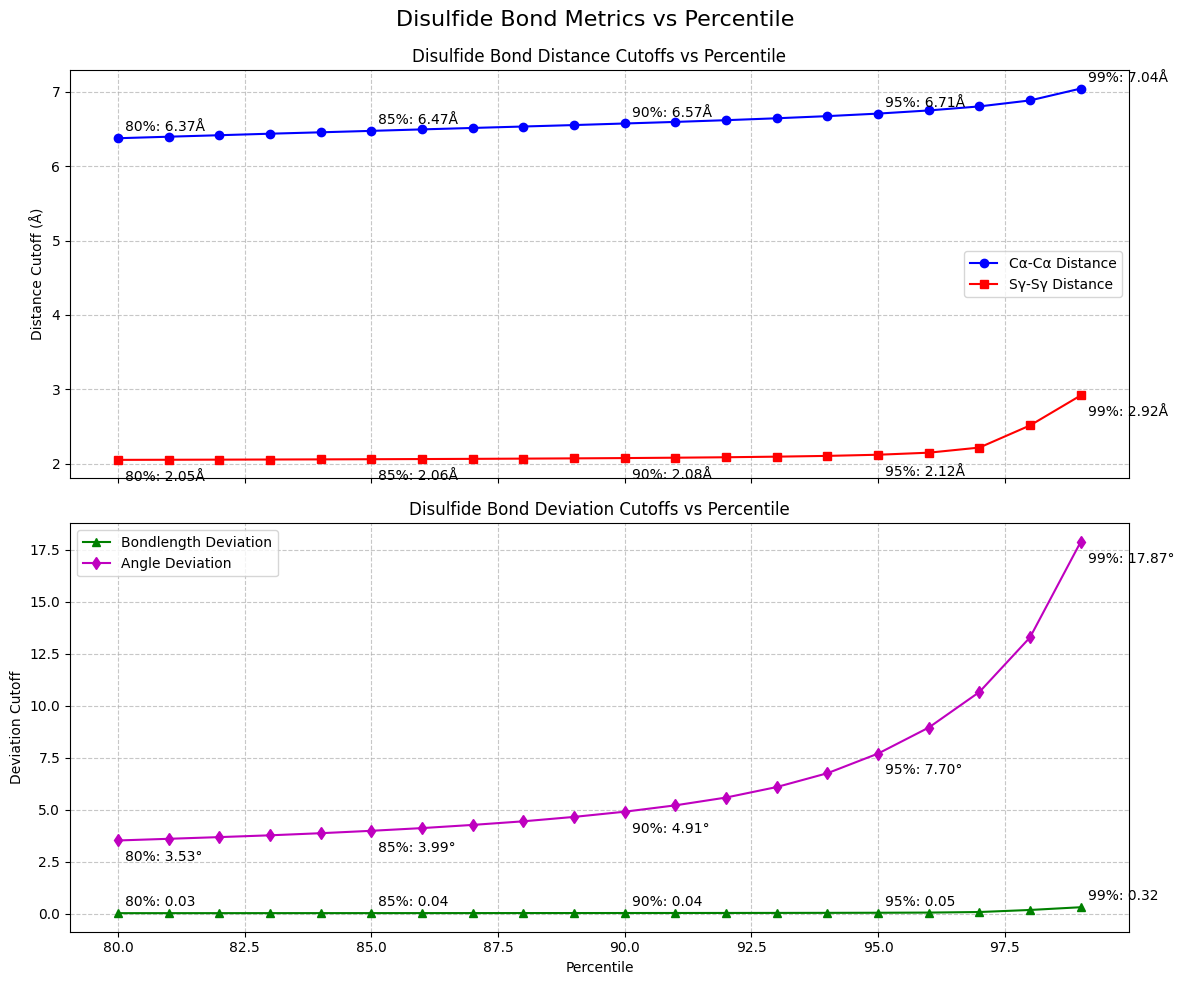

In [3]:
pp.DisulfideVisualization.plot_percentile_cutoffs(pdb, verbose=True)

In [ ]:
best = pdb.get_by_name("2q7q_75D_140D")
worst = pdb.get_by_name("6vxk_801B_806B")
bw = pp.DisulfideList([best, worst])
bw.display()

In [ ]:
entry = "5rsa"
sslist = pdb["5rsa"]
description = sslist.describe()

In [ ]:
sslist = DisulfideIO.load_disulfides_from_id(
    entry, verbose=True, cutoff=-1, sg_cutoff=2
)
description = sslist.describe()

In [ ]:
stats = dev_df["Angle_Deviation"].describe()
stats

In [ ]:
stats["std"]

In [ ]:
pdb5rsa = pdb["5rsa"]
pdb5rsa.average_conformation
# pdb5rsa.describe()

In [ ]:
sslist = pdb["6mbd"]
ss1 = pdb[0]

In [ ]:
tors = ss1.torsion_array
sslist.nearest_neighbors(5, tors)

In [ ]:
nn = sslist.nearest_neighbors(10, list(tors))
print(nn)

In [ ]:
sslist.nearest_neighbors_ss(ss1, 1)

In [ ]:
sslist.display(style="sb")

In [ ]:
PDB_SS["6dmb"]

In [ ]:
# pp.Bootstrap_PDB_SS(verbose=True, subset=True, fake=True, force=True)

In [ ]:
sslist = pdb.SSList
ssmin_enrg, ssmax_enrg = pdb.SSList.minmax_energy
low_energy_neighbors = ssmin_enrg.torsion_neighbors(sslist, 4)
len(low_energy_neighbors)

In [ ]:
low_energy_neighbors.display_overlay(light="auto")

In [ ]:
ss = pdb[0]
ss

In [ ]:
pdb = pp.DisulfideLoader(verbose=True, subset=True, cutoff=-1, sg_cutoff=-1)
pdb.save()

In [ ]:
segment = pp.DisulfideClassManager.get_class_string([0, -20, -120, -10, 180], base=8)
print(segment)

In [ ]:
import pandas as pd

# Assuming tors_df is already defined
tors_df = pdb.tclass.binaryclass_df

# Drop the 'ss_id' column
tors_df_dropped = tors_df.drop(columns=["ss_id"])

# Export DataFrame as Markdown table (install tabulate if needed)
md_table = tors_df_dropped.to_markdown(index=False)

# Write the Markdown table to a file
with open(
    "/Users/egs/repos/proteusPy/data/binary_class.md", "w", encoding="utf-8"
) as f:
    f.write(md_table)

In [ ]:
diheds = [-10, 60, -120, 180, 222]
diheds2 = [10, 60, -120, 180, -10]

In [ ]:
pdb.tclass.get_eighth_quadrant(diheds2) == pdb.tclass.get_class_string(diheds2, base=8)

In [ ]:
pdb.tclass.get_class_string([10, 60, -120, 180, -10], base=8)

In [ ]:
pdb.tclass.get_eighth_quadrant([-10, 60, -120, 180, 222])

In [ ]:
pdb.tclass.get_sixth_quadrant([-10, 60, -120, 180, 222])

In [ ]:
pdb.tclass.get_class_string([-10, 60, -120, 180, 222], base=6)

In [ ]:
pdb.tclass.get_eighth_quadrant(180)

In [ ]:
pdb.tclass.class_string_from_dihedral([-190, 60, -60, -120, -10], base=3)

In [ ]:
pdb.tclass.class_string_from_dihedral(180)

In [ ]:
pdb.tclass.get_binary_quadrant([180, -60, 60, -60, 120, 9])

In [ ]:
sslist = pdb[0]
# pp.set_plotly_theme('auto')
sslist.display(style="sb", light="auto")

In [ ]:
class_df = pdb.tclass.filter_class_by_percentage(0.04, 8)
print(class_df.shape[0])
class_df.head()

In [ ]:
tors_df = pdb.TorsionDF
classlist = tors_df["octant_class_string"].unique()
classlist.sort()
classlist

In [ ]:
sslist = pdb.SSList
class_df = pdb.tclass.eightclass_df
perc = class_df["percentage"] > 1.0
filt = class_df[perc]

In [ ]:
class_df.head()

In [ ]:
clslist = pdb.sslist_from_class("22224")
clslist.describe()

In [ ]:
ind = tors_df[tors_df["octant_class_string"] == "22222"].index
sslist = DisulfideList([], "new")
for i in ind:
    sslist.append(pdb[i])

sslist

In [ ]:
ind = pdb.class_indices_from_tors_df("22632", base=8)

In [ ]:
ind

In [ ]:
ss1 = pdb[0]
tors = ss1.torsion_array
type(tors)
type(tors[0])

In [ ]:
pp.DisulfideClassManager.class_string_from_dihedral(45, base=2)

In [ ]:
pdb.tclass.class_string_from_dihedral(tors, base=2)

In [ ]:
dc = pp.DisulfideClassManager(pdb)

In [ ]:
ss1.octant_class_string

In [ ]:
pdb.TorsionDF

In [ ]:
best_ss = pdb["2q7q_75D_140D"]
worst_ss = pdb["6vxk_801B_806B"]
duo = pp.DisulfideList([best_ss, worst_ss], "bestworst")
duo.display()

In [ ]:
pid = "1a2y"
resolution = 1.8
tot_ss = 150000
avg_enrg = 2.5
avg_dist = 3.5
title = f"<{pid}> {resolution:.2f} Å: ({tot_ss} SS), Avg E: {avg_enrg:.2f} kcal/mol, Avg Dist: {avg_dist:.2f} Å"
width = pp.utility.calculate_fontsize(title, 512)

# display_pyvista_window(title)

In [ ]:
sslist = pdb[:25]
sslist.display_overlay(winsize=(512, 512))

In [ ]:
ss = pdb[:10]
ss.display()

In [ ]:
pdb.plot_disulfides_vs_pdbid(10)

In [ ]:
pdb.plot_classes_vs_cutoff(0.25)

In [ ]:
pdb.print_classes(base=2)

In [ ]:
pdb.tclass.binaryclass_df.to_csv("binaryclass.csv", index=False)

In [ ]:
pdb.tclass.eightclass_df.head()

In [ ]:
pdb["22202b"]

In [ ]:
pdb["22020b"].display_torsion_statistics(save=False, theme="auto")

In [ ]:
pdb["22020b"].plot_deviation_histograms(verbose=True, theme="auto", log=False)

In [ ]:
pdb.plot_distances(distance_type="ca", theme="auto")

In [ ]:
pdb.plot_deviation_histograms(verbose=True, theme="auto")

In [ ]:
pdb["11212"].display_torsion_statistics(save=False, theme="auto")

In [ ]:
pdb["6dmb"].display_torsion_statistics(theme="auto")

In [ ]:
pdb["6dmb"]

In [ ]:
pdb["6dmb_203A_226A"]

In [ ]:
sslist = pdb.extract_class("11212o")
sslist

In [ ]:
sslist = pdb.tclass["11212o"]

In [ ]:
pdb["34567"].display_torsion_statistics(theme="auto")

In [ ]:
pdb.tclass.list_classes()

In [ ]:
pdb["22222b"]

In [ ]:
cdict = pdb.tclass.binaryclass_dict
for key in cdict:
    print(key, len(cdict[key]))

In [ ]:
def search_ss_id(df, ss_id_list):
    """
    Search the DataFrame for rows where the 'ss_id' column matches any entry in the list.

    :param df: The DataFrame to search.
    :param ss_id_list: The list of 'ss_id' entries to search for.
    :return: A DataFrame containing the matching rows.
    """
    matching_rows = []

    for index, row in df.iterrows():
        if any(ss_id in row["ss_id"] for ss_id in ss_id_list):
            matching_rows.append(row)

    return pd.DataFrame(matching_rows)

In [ ]:
classdf = tcon.eightclass_df
res = search_ss_id(classdf, ["7vx1_361B_391B"])

In [ ]:
res

In [ ]:
PDB = pp.Load_PDB_SS(
    verbose=True, subset=False, force=True, cutoff=CA_CUTOFF, sg_cutoff=SG_CUTOFF
)
PDB.describe()

In [ ]:
_logger = pp.create_logger("testing")
pp.configure_master_logger("tst.log")
pp.set_logger_level("testing", "WARNING")

sub = pp.Load_PDB_SS(verbose=False, subset=True)
sub[0]

In [ ]:
sslist = pdb[:20]
sslist.display_overlay(screenshot=True, verbose=True)

In [ ]:
pp.display_ss_pymol(
    "7nyc",
    chain="C",
    proximal=6,
    distal=41,
    ray=False,
    solvent=True,
    fname="7nyc_6c_41c.png",
)

In [ ]:
pp.display_ss_pymol(
    "2q7q",
    chain="D",
    proximal=75,
    distal=140,
    ray=False,
    solvent=True,
    sas=True,
    fname="2q7q.png",
)

In [ ]:
xx = PDB["2q7q_75D_140D"]
xx

In [ ]:
pp.display_ss_pymol("2q7q", "75", "140", "D")

In [ ]:
ss1 = pdb[0]
ss1.pprint()

In [ ]:
ss1.pprint_all()

In [ ]:
pdb2 = DisulfideLoader(verbose=True, subset=False, cutoff=7, sg_cutoff=3)

In [ ]:
pdb2.describe()

In [ ]:
sslist2 = pdb2.SSList.filter_by_distance(7.0)
len(sslist2)

In [ ]:
pdb2[0].pprint_all()

In [ ]:
good = 0
for ss in pdb.SSList:
    if ss.sg_distance > 2.5:
        bad += 1
bad

In [ ]:
sslist = pdb.SSList.filter_by_sg_distance(3.0)
sslist.pdb_id

In [ ]:
len(pdb.SSList) - len(sslist)

In [ ]:
import matplotlib.pyplot as plt


def extract_sg_distances(disulfide_list, cutoff=4):
    """
    Extract and filter the sg_distance values from the disulfide list.

    :param disulfide_list: List of disulfide objects.
    :return: List of sg_distance values less than 10.
    """
    sg_distances = [ds.sg_distance for ds in disulfide_list if ds.sg_distance < cutoff]
    return sg_distances


import pandas as pd
import plotly.express as px


def plot_sg_distances(sg_distances, cutoff=4):
    """
    Plot the sg_distance values as a histogram using plotly express.

    :param sg_distances: List of sg_distance values.
    """
    # Convert to a Pandas DataFrame with a column named 'SG Distance'
    df = pd.DataFrame(sg_distances, columns=["SG Distance"])

    fig = px.histogram(
        df,
        x="SG Distance",  # Use the column name for the x-axis
        nbins=100,
        title="Histogram of SG Distances",
    )
    fig.update_layout(
        xaxis_title=f"SG Distance < {cutoff}",
        yaxis_title="Frequency",
        bargap=0.2,
        template="plotly_white",
    )
    fig.show()

In [ ]:
# Example usage
disulfide_list = pdb.SSList  # Replace with your list of disulfide objects
sg_distances = extract_sg_distances(disulfide_list, cutoff=5)
plot_sg_distances(sg_distances)

In [ ]:
pdb[0].pprint_all()
ss1 = pdb[0]
ss1.missing_atoms

In [ ]:
pdb["3q7q"]

In [ ]:
pdb.SSDict.get("xxx")

In [ ]:
pdb["2q7q_75D_140D"]

In [ ]:
pdb.get_by_name("2q7q_75D_140D")

In [ ]:
ind = pdb.SSDict.get("2q7q_75D")
ind

In [ ]:
def get_pdbid_with_max_disulfides(PDB_SS):
    """
    Enumerates PDB_SS.SSDict and returns the pdbid for the key with the largest number of disulfides.

    Args:
        PDB_SS (object): The object containing the SSDict attribute.

    Returns:
        str: The pdbid with the largest number of disulfides.
    """
    max_disulfides = 0
    pdbid_with_max_disulfides = None

    for pdbid, disulfides in PDB_SS.SSDict.items():
        num_disulfides = len(disulfides)
        if num_disulfides > max_disulfides:
            max_disulfides = num_disulfides
            pdbid_with_max_disulfides = pdbid

    return pdbid_with_max_disulfides, max_disulfides

In [ ]:
get_pdbid_with_max_disulfides(pdb)

In [ ]:
big = pdb["7nyc"]

In [ ]:
import matplotlib.pyplot as plt


def plot_disulfides_vs_pdbid(PDB_SS, cutoff=1):
    """
    Plots the number of disulfides versus pdbid.

    Args:
        PDB_SS (object): The object containing the SSDict attribute.
    """
    pdbids = []
    num_disulfides = []

    for pdbid, disulfides in PDB_SS.SSDict.items():
        if len(disulfides) > cutoff:
            pdbids.append(pdbid)
            num_disulfides.append(len(disulfides))

    plt.figure(figsize=(12, 6))
    plt.bar(pdbids, num_disulfides, color="skyblue")
    plt.xlabel("PDB ID")
    plt.ylabel("Number of Disulfides")
    plt.title(f"Number of Disulfides vs PDB ID with cutoff: {cutoff}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    return pdbids, num_disulfides

In [ ]:
pdbids, num_disulfides = plot_disulfides_vs_pdbid(PDB, cutoff=50)

In [ ]:
colors = [
    ["ff0000", "28e5da", "0000ff"],
    ["ffff00", "c8bebe", "f79292"],
    ["fffff0", "f18c1d", "23dcaa"],
    ["d785ec", "9d5b13", "e4e0b1"],
    ["894509", "af45f5", "fff000"],
]


class SetVisibilityCallback:
    """Helper callback to keep a reference to the actor being modified."""

    def __init__(self, actor):
        self.actor = actor

    def __call__(self, state):
        self.actor.SetVisibility(state)


# Widget size
import pyvista as pv

size = 50

p = pv.Plotter()

Startpos = 12
for i, lst in enumerate(colors):
    for j, color in enumerate(lst):
        actor = p.add_mesh(pv.Sphere(center=(i, j, 0)), color=color)
        # Make a separate callback for each widget
        callback = SetVisibilityCallback(actor)
        p.add_checkbox_button_widget(
            callback,
            value=True,
            position=(5.0, Startpos),
            size=size,
            border_size=1,
            color_on=color,
            color_off="grey",
            background_color="grey",
        )
        Startpos = Startpos + size + (size // 10)

p.show()

In [ ]:
ss1 = pdb[0]
# ss1.pprint_all()
cofmass = ss1.coord_cofmass

In [ ]:
ss1.translate(Vector3D(-cofmass))
ss1.pprint_all()

In [ ]:
crn1 = pdb["1crn"]
crn1.pprint_all()
cofmass = crn1.center_of_mass
cofmass

In [ ]:
crn1.translate(Vector3D(-cofmass))
print(f"Center of mass is {cofmass}")
crn1.pprint_all()

In [ ]:
sslist.build_distance_df()

In [ ]:
sslist.average_torsion_distance

In [ ]:
sslist.display_overlay()

In [ ]:
sslist = load_disulfides_from_id("1tgk", pdb_dir=MODEL_DIR)
sslist

In [ ]:
sslist.average_energy

In [ ]:
sslist.average_conformation

In [ ]:
pdb["1tgk"]

In [ ]:
sslist = pdb["4yys"]

In [ ]:
sslist = pdb.build_ss_from_idlist(["5rsa", "4yys", "2q7q"])
sslist

In [ ]:
ss = pdb["2q7q_75D_140D"]

In [ ]:
neighbors = pdb.SSList.nearest_neighbors_ss(ss, 3)
neighbors

In [ ]:
neighbors2 = pdb.SSList.nearest_neighbors(5, [-60, -60, -83, -60, -60])
neighbors2.describe()
neighbors2.display_overlay()

In [ ]:
neighbors3 = pdb.SSList.nearest_neighbors(3.5, list(ss.dihedrals))
neighbors3

In [ ]:
sslist2 = pdb.SSList[:1000]
df = sslist2.create_deviation_dataframe()

In [ ]:
df.describe()

In [ ]:
ss.display()

In [ ]:
ss1 = pdb[0]
ss1.display(light="Auto", winsize=(800, 800))

In [ ]:
pp.get_theme()

In [ ]:
ss1 = pdb[0]
type(ss1)

In [ ]:
ss1.display(style="sb", light=False)

In [ ]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
from proteusPy import Disulfide


def add_to_list(n, pdb_sslist):
    disulfide_list = []
    for i in range(n):
        disulfide_list.append(pdb_sslist[i])

    sslist = DisulfideList(disulfide_list, "tmp")
    avg = sslist.average_conformation


def add_to_ndarray(n, pdb_sslist):
    disulfide_array = np.empty(n, dtype=object)
    for i in range(n):
        disulfide_array[i] = pdb_sslist[i]
    sslist = DisulfideList(disulfide_array, "tmp")
    avg = sslist.average_conformation


def profile_sslist(sslist):
    # Number of objects to add
    num_objects = [1000, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]

    # Measure time for adding to list
    list_times = []
    for n in num_objects:
        time = timeit.timeit(lambda: add_to_list(n, sslist), number=10)
        list_times.append(time)

    # Measure time for adding to ndarray
    ndarray_times = []
    for n in num_objects:
        time = timeit.timeit(lambda: add_to_ndarray(n, sslist), number=10)
        ndarray_times.append(time)

    # Plot the results
    plt.plot(num_objects, list_times, label="DisulfideList (list)")
    plt.plot(num_objects, ndarray_times, label="ndarray")
    plt.xlabel("Number of Disulfide Objects")
    plt.ylabel("Time (seconds)")
    plt.title("Comparison of Adding Disulfide Objects to List vs. ndarray")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
profile_sslist(pdb.SSList)

In [ ]:
tors_df2 = ss1.torsion_df
tors_df2.describe()

In [ ]:
pdb = DisulfideLoader(verbose=True, subset=True, cutoff=8.0)

In [ ]:
pdb = Load_PDB_SS(verbose=True, subset=False, cutoff=8.0)

In [ ]:
pdb[0]

In [ ]:
PDB_SS = Load_PDB_SS(subset=False, verbose=True)
PDB_SS.describe()

In [ ]:
import os
from pathlib import Path
import importlib.resources as pkg_resources

# Determine the base directory of the installed package
this_dir = Path(pkg_resources.files("proteusPy"))
this_dir

In [ ]:
ss1 = PDB_SS[0]
ss1.rho

In [ ]:
from proteusPy import (
    torsion_to_sixclass,
    torsion_to_eightclass,
    torsion_to_class_string,
)

lhs = [-60, -60, -90, -60, -60]
rhs = [60, 60, 90, 60, 60]
six = torsion_to_sixclass(lhs)
eight = torsion_to_eightclass(lhs)

In [ ]:
cls = torsion_to_class_string(lhs, base=6)
cls

In [ ]:
six

In [ ]:
eight

In [ ]:
sixr = torsion_to_sixclass(rhs)
eightr = torsion_to_eightclass(rhs)

In [ ]:
sixr

In [ ]:
eightr

In [ ]:
torsion_to_class_string(lhs, 6)

In [ ]:
torsion_to_class_string(lhs, 8)

In [ ]:
def plot_disulfide_secondary_structures(pdb_ss):
    """
    Plot a graph of disulfide secondary structures segmented by secondary structure.

    :param pdb_ss: The PDB_SS object containing SSList with disulfide bonds.
    :type pdb_ss: object
    """
    # Initialize counters for each secondary structure type
    helix_count = 0
    sheet_count = 0
    turn_count = 0
    nosecondary_count = 0

    # Iterate through the SSList and count the secondary structures
    for ss in pdb_ss.SSList:
        proximal_secondary = ss.proximal_secondary
        distal_secondary = ss.distal_secondary

        if proximal_secondary == "helix":
            helix_count += 1
        elif proximal_secondary == "sheet":
            sheet_count += 1
        elif proximal_secondary == "turn":
            turn_count += 1
        elif proximal_secondary == "nosecondary":
            nosecondary_count += 1

        if distal_secondary == "helix":
            helix_count += 1
        elif distal_secondary == "sheet":
            sheet_count += 1
        elif distal_secondary == "turn":
            turn_count += 1
        elif distal_secondary == "nosecondary":
            nosecondary_count += 1

    # Data for plotting
    labels = ["Helix", "Sheet", "Turn", "No Secondary"]
    counts = [helix_count, sheet_count, turn_count, nosecondary_count]

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts, color=["blue", "green", "red", "gray"])
    plt.xlabel("Secondary Structure")
    plt.ylabel("Count of Disulfide Bonds")
    plt.title("Disulfide Bonds Segmented by Secondary Structure")
    plt.show()


import matplotlib.pyplot as plt


def plot_disulfide_secondary_structure_cooccurrence(pdb_ss):
    """
    Plot a graph of disulfide secondary structure co-occurrence by proximal-distal type.

    :param pdb_ss: The PDB_SS object containing SSList with disulfide bonds.
    :type pdb_ss: object
    """
    # Initialize counters for each proximal-distal secondary structure combination
    cooccurrence_counts = {}
    skipped = 0
    turns = 0
    cnt = 0

    # Iterate through the SSList and count the secondary structure combinations
    for ss in pdb_ss.SSList:
        proximal_secondary = ss.proximal_secondary
        distal_secondary = ss.distal_secondary
        # Skip disulfide bonds with no secondary structure or with a turn secondary structure

        if proximal_secondary == "nosecondary" or distal_secondary == "nosecondary":
            skipped += 1
            continue

        if proximal_secondary == "turn" or distal_secondary == "turn":
            turns += 1
            continue

        key = (proximal_secondary, distal_secondary)

        if key in cooccurrence_counts:
            cooccurrence_counts[key] += 1
        else:
            cooccurrence_counts[key] = 1

        cnt += 1

    print(
        f"Skipped {skipped} disulfide bonds with no secondary structure and {turns} turn secondary structure.\n"
        f"Disulfides used: {cnt}"
    )

    # Data for plotting
    labels = [f"{prox}-{dist}" for prox, dist in cooccurrence_counts.keys()]
    counts = list(cooccurrence_counts.values())

    # Plotting the data
    plt.figure(figsize=(12, 8))
    plt.bar(labels, counts, color="skyblue")
    plt.xlabel("Proximal-Distal Secondary Structure")
    plt.ylabel("Count of Disulfide Bonds")
    plt.title("Co-occurrence of Secondary Structures by Proximal-Distal Type")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plot_disulfide_secondary_structure_and_rho(pdb_ss):
    """
    Plot a graph of disulfide secondary structure co-occurrence by proximal-distal type
    and the disulfide parameter rho with error bars.

    :param pdb_ss: The PDB_SS object containing SSList with disulfide bonds.
    :type pdb_ss: object
    """
    # Initialize data structures for secondary structure combinations and rho values
    cooccurrence_counts = {}
    rho_values = {}

    # Iterate through the SSList and collect data
    for ss in pdb_ss.SSList:
        proximal_secondary = ss.proximal_secondary.strip().lower()
        distal_secondary = ss.distal_secondary.strip().lower()

        # Skip disulfide bonds with no secondary structure or with a turn secondary structure
        if proximal_secondary == "no_secondary" or distal_secondary == "no_secondary":
            continue

        if proximal_secondary == "turn" or distal_secondary == "turn":
            continue

        key = (proximal_secondary, distal_secondary)

        if key in cooccurrence_counts:
            cooccurrence_counts[key] += 1
            rho_values[key].append(ss.ca_distance)
        else:
            cooccurrence_counts[key] = 1
            rho_values[key] = [ss.rho]

    # Data for plotting
    labels = [f"{prox}-{dist}" for prox, dist in cooccurrence_counts.keys()]
    counts = list(cooccurrence_counts.values())
    rho_means = [np.mean(rho_values[key]) for key in rho_values.keys()]
    rho_stds = [np.std(rho_values[key]) for key in rho_values.keys()]

    # Plotting the secondary structure co-occurrence
    plt.figure(figsize=(12, 8))
    plt.bar(labels, counts, color="skyblue")
    plt.xlabel("Proximal-Distal Secondary Structure")
    plt.ylabel("Count of Disulfide Bonds")
    plt.title("Co-occurrence of Secondary Structures by Proximal-Distal Type")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Plotting the rho values with error bars
    plt.figure(figsize=(12, 8))
    plt.errorbar(
        labels,
        rho_means,
        yerr=rho_stds,
        fmt="o",
        color="red",
        ecolor="black",
        capsize=5,
    )
    plt.xlabel("Proximal-Distal Secondary Structure")
    plt.ylabel("Mean Rho Value")
    plt.title("Mean Rho Value by Proximal-Distal Secondary Structure with Error Bars")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [ ]:
plot_disulfide_secondary_structure_and_rho(PDB_SS)

In [ ]:
plot_disulfide_secondary_structures(PDB_SS)

In [ ]:
plot_disulfide_secondary_structure_cooccurrence(PDB_SS)

In [ ]:
from proteusPy import extract_ssbonds_and_atoms
from pathlib import Path
import os

verbose = True
structure_fname = str(MODEL_DIR / "pdb5rsa.ent")
ssbond_atom_list, num_ssbonds, errors = extract_ssbonds_and_atoms(
    structure_fname, verbose=verbose
)

In [ ]:
ssbond_atom_list["helices"]

In [ ]:
ssbond_atom_list["sheets"]

In [ ]:
ssbond_atom_list["turns"]

In [ ]:
ssbond_atom_list["ssbonds"]

In [ ]:
ssbond_atom_list["pairs"]

In [ ]:
ssbond_atom_list["pairs"]

In [ ]:
df = pd.DataFrame()
fig = PDB_SS.plot_count_vs_class_df(
    df,
    title="Binary",
    save=True,
    savedir=BINARY,
    verbose=True,
    base=2,
)
fig.show()

In [ ]:
PDB_SS.plot_binary_to_eightclass_incidence(
    theme="light", save=True, verbose=True, savedir=OCTANT
)

In [ ]:
PDB_SS.plot_binary_to_sixclass_incidence(
    theme="light", save=True, verbose=True, savedir=SEXTANT
)

In [ ]:
clslist6 = PDB_SS.tclass.sslist_from_classid("55555", base=6)
clslist6

In [ ]:
clslist8 = PDB_SS.tclass.sslist_from_classid("77778", base=8)
clslist8

In [ ]:
df2 = PDB_SS.tclass.classdf
df8 = PDB_SS.tclass.eightclass_df

In [ ]:
df2.head(32)

In [ ]:
df8

In [ ]:
df6

In [ ]:
def enumerate_class_fromlist(loader: DisulfideLoader, sslist):
    import pandas as pd

    x = []
    y = []

    for cls in sslist:
        if cls is not None:
            _y = loader.tclass.sslist_from_classid(cls)
            # it's possible to have 0 SS in a class
            if _y is not None:
                # only append if we have both.
                x.append(cls)
                y.append(len(_y))

    sslist_df = pd.DataFrame(columns=["class_id", "count"])
    sslist_df["class_id"] = x
    sslist_df["count"] = y
    return sslist_df

In [ ]:
cls = "00000"
sixcls = PDB_SS.tclass.binary_to_class(cls, 6)
df = enumerate_class_fromlist(PDB_SS, sixcls)
# Assuming 'count' is the column by which we want to sort
sorted_df = df.sort_values(by="count", ascending=False)

# Display the sorted DataFrame
print(sorted_df)

In [ ]:
cls = "00000"
eightcls = PDB_SS.tclass.binary_to_eight_class(cls)
# eightcls

df = enumerate_class_fromlist(PDB_SS, eightcls)
# Assuming 'count' is the column by which we want to sort
sorted_df = df.sort_values(by="count", ascending=False)

# Display the sorted DataFrame
print(sorted_df)

In [ ]:
PDB_SS.plot_binary_to_eightclass_incidence(theme="light")

In [ ]:
PDB_SS.plot_count_vs_class_df(df, cls, theme="light")

In [ ]:
PDB_SS.plot_binary_to_sixclass_incidence(light=False)

In [ ]:
eight = PDB_SS.tclass.eightclass_df
eight.head(-10)

In [ ]:
sslist2 = PDB_SS.extract_class("87784")
sslist2

In [ ]:
PDB_SS.plot_classes_vs_cutoff(0.1, 20)

In [ ]:
ssdict = PDB_SS.SSDict
ssdict

In [ ]:
def build_ss_from_idlist(loader, idlist):
    """
    Return a DisulfideList of Disulfides for a given list of PDBIDs

    :param idlist: List of PDBIDs, e.g. ['4yys', '2q7q']
    :return: DisulfideList
    """
    res = DisulfideList([], "RCSB_list")
    for k, v in loader.SSDict.items():
        if k in idlist:
            for ss_index in range(len(v)):
                res.append(loader.SSList[v[ss_index]])
    return res

In [ ]:
sslist = build_ss_from_idlist(PDB_SS, ["4yys", "2q7q"])
sslist

In [ ]:
slice = PDB_SS[10:20]
slice.pdb_id

In [ ]:
sslist = PDB_SS.SSList
slice2 = sslist[100:200]
slice2.pdb_id

In [ ]:
tors = [-60, -60, 90, -60, -60]
ss1 = Disulfide(torsions=tors)
ss1.pprint_all()

In [ ]:
ss1 = PDB_SS["2q7q_75D_140D"]
ss1.quiet = False
ss1.bond_length_ideality
ss1.bond_angle_ideality

In [ ]:
dihed = ss1.dihedrals
modelled_min = Disulfide("model", quiet=False)
modelled_min.dihedrals = dihed
modelled_min.build_yourself()
modelled_min.bond_length_ideality

In [ ]:
# investigate the distal N->Ca distance. 8/15/24 -egs-

modelled_min.bond_angle_ideality

In [ ]:
sslist = PDB_SS.SSList
len(sslist)

In [ ]:
import pandas as pd
from tqdm import tqdm


def create_disulfide_dataframe(disulfide_list):
    """
    Create a DataFrame with columns PDB_ID, SS_Name, Angle_Deviation, Distance_Deviation
    from a list of disulfides.

    :param disulfide_list: List of disulfide objects.
    :type proteusPy.DisulfideList: list
    :return: DataFrame containing the disulfide information.
    :rtype: pd.DataFrame
    """
    data = {
        "PDB_ID": [],
        "SS_Name": [],
        "Angle_Deviation": [],
        "Distance_Deviation": [],
        "Ca_Distance": [],
    }

    for ss in tqdm(disulfide_list, desc="Processing Disulfides"):
        pdb_id = ss.pdb_id
        ca_distance = ss.ca_distance
        angle_deviation = ss.bond_angle_ideality
        distance_deviation = ss.bond_length_ideality

        data["PDB_ID"].append(pdb_id)
        data["SS_Name"].append(ss.name)
        data["Angle_Deviation"].append(angle_deviation)
        data["Distance_Deviation"].append(distance_deviation)
        data["Ca_Distance"].append(ca_distance)

    df = pd.DataFrame(data)
    return df


# Example usage
# Assuming you have a list of disulfide objects called disulfide_list
# df = create_disulfide_dataframe(disulfide_list)
# print(df)

In [ ]:
dev_df = create_disulfide_dataframe(sslist)

In [ ]:
dev_df.describe()

In [ ]:
dev_df.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_histograms(df):
    """
    Plot histograms for Distance_Deviation, Angle_Deviation, and Ca_Distance.

    :param df: DataFrame containing the disulfide information.
    :type df: pd.DataFrame
    """
    plt.figure(figsize=(21, 6))

    # Distance Deviation Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df["Distance_Deviation"], kde=True, bins=30)
    plt.title("Distance Deviation Distribution")
    plt.xlabel("Distance Deviation")
    plt.ylabel("Frequency")

    # Angle Deviation Histogram
    plt.subplot(1, 3, 2)
    sns.histplot(df["Angle_Deviation"], kde=True, bins=30)
    plt.title("Angle Deviation Distribution")
    plt.xlabel("Angle Deviation")
    plt.ylabel("Frequency")

    # Ca_Distance Histogram
    plt.subplot(1, 3, 3)
    sns.histplot(df["Ca_Distance"], kde=True, bins=30)
    plt.title("Ca Distance Distribution")
    plt.xlabel("Ca Distance")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

In [ ]:
# plot_histograms(dev_df)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def highlight_worst_structures(df, top_n=10):
    """
    Highlight the worst structures for distance and angle deviations and annotate their names.
    Also, add a subplot showing the worst structures aggregated by PDB_ID.

    :param df: DataFrame containing the disulfide information.
    :type df: pd.DataFrame
    :param top_n: Number of worst structures to highlight.
    :type top_n: int
    """
    # Identify the worst structures for distance deviation
    worst_distance = df.nlargest(top_n, "Distance_Deviation")

    # Identify the worst structures for angle deviation
    worst_angle = df.nlargest(top_n, "Angle_Deviation")

    # Combine the worst structures
    worst_structures = pd.concat([worst_distance, worst_angle]).drop_duplicates()

    # Aggregate worst structures by PDB_ID
    worst_structures_agg = (
        worst_structures.groupby("PDB_ID").size().reset_index(name="Count")
    )

    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    # Scatter plot for all structures
    sns.scatterplot(
        x="Distance_Deviation",
        y="Angle_Deviation",
        data=df,
        label="All Structures",
        ax=axes[0],
    )

    # Highlight the worst structures
    sns.scatterplot(
        x="Distance_Deviation",
        y="Angle_Deviation",
        data=worst_structures,
        color="red",
        label="Worst Structures",
        marker="X",
        s=100,
        ax=axes[0],
    )

    # Annotate the worst structures with their names
    for i, row in worst_structures.iterrows():
        axes[0].annotate(
            row["SS_Name"],
            (row["Distance_Deviation"], row["Angle_Deviation"]),
            textcoords="offset points",
            xytext=(5, 5),
            ha="right",
        )

    axes[0].set_title("Distance Deviation vs. Angle Deviation")
    axes[0].set_xlabel("Distance Deviation")
    axes[0].set_ylabel("Angle Deviation")
    axes[0].legend()

    # Bar plot for worst structures aggregated by PDB_ID
    sns.barplot(x="PDB_ID", y="Count", data=worst_structures_agg, ax=axes[1])
    axes[1].set_title("Worst Structures Aggregated by PDB_ID")
    axes[1].set_xlabel("PDB_ID")
    axes[1].set_ylabel("Count")
    axes[1].tick_params(axis="x", rotation=90)

    plt.tight_layout()
    plt.show()


# Example usage
# Assuming you have a DataFrame named dev_df
# highlight_worst_structures(dev_df, top_n=10)

In [ ]:
highlight_worst_structures(dev_df, top_n=10)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def highlight_worst_structures2(df, top_n=10):
    """
    Highlight the worst structures for distance and angle deviations and annotate their names.
    Also, add subplots showing the worst structures aggregated by PDB_ID for distance and angle deviations.

    :param df: DataFrame containing the disulfide information.
    :type df: pd.DataFrame
    :param top_n: Number of worst structures to highlight.
    :type top_n: int
    """
    # Identify the worst structures for distance deviation
    worst_distance = df.nlargest(top_n, "Distance_Deviation")

    # Identify the worst structures for angle deviation
    worst_angle = df.nlargest(top_n, "Angle_Deviation")

    # Combine the worst structures
    worst_structures = pd.concat([worst_distance, worst_angle]).drop_duplicates()

    # Aggregate worst structures by PDB_ID for distance and angle deviations
    worst_distance_agg = (
        worst_distance.groupby("PDB_ID").size().reset_index(name="Count")
    )
    worst_angle_agg = worst_angle.groupby("PDB_ID").size().reset_index(name="Count")

    fig, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Histogram for distance deviation
    sns.histplot(df["Distance_Deviation"], kde=True, bins=30, ax=axes[0])
    axes[0].set_title("Distance Deviation Distribution")
    axes[0].set_xlabel("Distance Deviation")
    axes[0].set_ylabel("Frequency")

    # Histogram for angle deviation
    sns.histplot(df["Angle_Deviation"], kde=True, bins=30, ax=axes[1])
    axes[1].set_title("Angle Deviation Distribution")
    axes[1].set_xlabel("Angle Deviation")
    axes[1].set_ylabel("Frequency")

    # Bar plots for worst structures aggregated by PDB_ID
    sns.barplot(
        x="PDB_ID",
        y="Count",
        data=worst_distance_agg,
        ax=axes[2],
        color="blue",
        label="Distance Deviation",
    )
    sns.barplot(
        x="PDB_ID",
        y="Count",
        data=worst_angle_agg,
        ax=axes[2],
        color="green",
        label="Angle Deviation",
        alpha=0.6,
    )
    axes[2].set_title("Worst Structures Aggregated by PDB_ID")
    axes[2].set_xlabel("PDB_ID")
    axes[2].set_ylabel("Count")
    axes[2].tick_params(axis="x", rotation=90)
    axes[2].legend()

    plt.tight_layout()
    plt.show()


# Example usage
# Assuming you have a DataFrame named dev_df
# highlight_worst_structures(dev_df, top_n=10)

In [ ]:
highlight_worst_structures2(dev_df, top_n=10)

In [ ]:
import pandas as pd
import numpy as np


def calculate_std_cutoff(df, column, num_std=2):
    """
    Calculate cutoff based on standard deviation.

    :param df: DataFrame containing the deviations.
    :type df: pd.DataFrame
    :param column: Column name for which to calculate the cutoff.
    :type column: str
    :param num_std: Number of standard deviations to use for the cutoff.
    :type num_std: int
    :return: Cutoff value.
    :rtype: float
    """
    mean = df[column].mean()
    std = df[column].std()
    cutoff = mean + num_std * std
    return cutoff


def calculate_percentile_cutoff(df, column, percentile=95):
    """
    Calculate cutoff based on percentile.

    :param df: DataFrame containing the deviations.
    :type df: pd.DataFrame
    :param column: Column name for which to calculate the cutoff.
    :type column: str
    :param percentile: Percentile to use for the cutoff.
    :type percentile: int
    :return: Cutoff value.
    :rtype: float
    """
    cutoff = np.percentile(df[column].dropna(), percentile)
    return cutoff


# Example usage
# distance_cutoff = calculate_percentile_cutoff(dev_df, 'Distance_Deviation', percentile=95)
# angle_cutoff = calculate_percentile_cutoff(dev_df, 'Angle_Deviation', percentile=95)

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named dev_df with columns 'Distance_Deviation' and 'Angle_Deviation'

# Standard Deviation Method
distance_cutoff_std = calculate_std_cutoff(dev_df, "Distance_Deviation", num_std=3)
angle_cutoff_std = calculate_std_cutoff(dev_df, "Angle_Deviation", num_std=3)
ca_cutoff_std = calculate_std_cutoff(dev_df, "Ca_Distance", num_std=3)

# Percentile Method
distance_cutoff_percentile = calculate_percentile_cutoff(
    dev_df, "Distance_Deviation", percentile=98
)
angle_cutoff_percentile = calculate_percentile_cutoff(
    dev_df, "Angle_Deviation", percentile=98
)
ca_cutoff_percentile = calculate_percentile_cutoff(dev_df, "Ca_Distance", percentile=98)

print(f"Distance Deviation Cutoff (3 Std Dev): {distance_cutoff_std}")
print(f"Angle Deviation Cutoff (3 Std Dev): {angle_cutoff_std}")
print(f"Ca Distance Cutoff (3 Std Dev): {ca_cutoff_std}\n")

print(f"Distance Deviation Cutoff (98th Percentile): {distance_cutoff_percentile}")
print(f"Angle Deviation Cutoff (98th Percentile): {angle_cutoff_percentile}")
print(f"Ca Distance Cutoff (98th Percentile): {ca_cutoff_percentile}")

In [ ]:
import pandas as pd


def filter_by_cutoffs(df, distance_cutoff, angle_cutoff):
    """
    Filter the DataFrame based on distance and angle cutoffs.

    :param df: DataFrame containing the deviations.
    :type df: pd.DataFrame
    :param distance_cutoff: Cutoff value for distance deviation.
    :type distance_cutoff: float
    :param angle_cutoff: Cutoff value for angle deviation.
    :type angle_cutoff: float
    :return: Filtered DataFrame.
    :rtype: pd.DataFrame
    """
    filtered_df = df[
        (df["Distance_Deviation"] <= distance_cutoff)
        & (df["Angle_Deviation"] <= angle_cutoff)
    ]
    return filtered_df


# Example usage
# Assuming you have a DataFrame named dev_df
# distance_cutoff = 5.0
# angle_cutoff = 10.0
# filtered_df = filter_by_cutoffs(dev_df, distance_cutoff, angle_cutoff)
# print(filtered_df)

In [ ]:
dev_df.shape[0]

In [ ]:
filt = filter_by_cutoffs(dev_df, 1.0, 10.0)
filt.shape[0]

In [ ]:
dev_df.shape[0]

In [ ]:
print(dev_df["Angle_Deviation"].isna().sum())

In [ ]:
import pandas as pd
import numpy as np


def calculate_std_cutoff(df, column, num_std=2):
    mean = df[column].mean()
    std = df[column].std()
    cutoff = mean + num_std * std
    return cutoff


def calculate_percentile_cutoff(df, column, percentile=95):
    cutoff = np.percentile(df[column].dropna(), percentile)
    return cutoff


# Assuming you have a DataFrame named dev_df with columns 'Distance_Deviation' and 'Angle_Deviation'

# Check for missing values
print(f"Missing values in 'Angle_Deviation': {dev_df['Angle_Deviation'].isna().sum()}")

# Drop missing values for the calculation
dev_df = dev_df.dropna(subset=["Angle_Deviation", "Distance_Deviation"])

# Standard Deviation Method
distance_cutoff_std = calculate_std_cutoff(dev_df, "Distance_Deviation", num_std=3)
angle_cutoff_std = calculate_std_cutoff(dev_df, "Angle_Deviation", num_std=3)

# Percentile Method
distance_cutoff_percentile = calculate_percentile_cutoff(
    dev_df, "Distance_Deviation", percentile=98
)
angle_cutoff_percentile = calculate_percentile_cutoff(
    dev_df, "Angle_Deviation", percentile=98
)

print(f"Distance Deviation Cutoff (3 Std Dev): {distance_cutoff_std}")
print(f"Angle Deviation Cutoff (3 Std Dev): {angle_cutoff_std}")
print(f"Distance Deviation Cutoff (98th Percentile): {distance_cutoff_percentile}")
print(f"Angle Deviation Cutoff (98th Percentile): {angle_cutoff_percentile}")